# Analisi sulla Lettura

<style>
    /* Aumenta la dimensione del testo */
    .reveal section {
        font-size: 26px;
        text-align: center;
    }

    /* In quanto il tema "sky" impone titoli tutti maiuscoli */
    .reveal .slides section h1,
    .reveal .slides section h2,
    .reveal .slides section h3,
    .reveal .slides section h4,
    .reveal .slides section h5,
    .reveal .slides section h6 {
        text-transform: none !important;
    }

    /* Immagine fissa in alto a destra */
    .reveal::after {
        content: "";
        position: fixed;
        top: 10px;
        right: 10px;
        width: 250px;
        height: 200px;
        background-image: url('uniud.png');
        background-size: contain;
        background-repeat: no-repeat;
        pointer-events: none;
        opacity: 0.8;
        z-index: 1000;
    }
</style>

# Introduzione
* ### Obiettivo dell'analisi
* ### Origine del dataset
* ### Motivazioni

-----

In [10]:
# Pulizia del dataset

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale=1)     #così da avere impostazioni "standard" per tutti i grafici, tranne uno (che avrà impostazioni diverse)

file=pd.read_csv(r'AnalisiLettura.csv')
f = file.drop('Informazioni cronologiche', axis=1)

df = f.rename(columns={      #per rinominare colonne che devono proprio essere modificate
    'Sei': 'Categoria',
    'Libri letti in media (circa) in un anno': 'Media',
    'Solitamente leggi...': 'Orario',
    'Libro (copertina rigida)': 'pref_rigido',
    'Libro (copertina flessibile)': 'pref_flessibile',
    'Ebook':'pref_ebook',
    'Audiolibro': 'pref_audiolibro',
    'Libro (copertina rigida).1':'com_rigido',
    'Libro (copertina flessibile).1':'com_flessibile',
    'Ebook.1':'com_ebook',
    'Audiolibro.1': 'com_audiolibro',
    'Avventura/Azione':'Azione',
    'Biografia/Autobiografia':'Biografia',
    'Romanzo storico':'Storico',
    'Rosa/Romance':'Rosa'
    })

col_names = list(df.columns)
for i in range(-15, 0):
    col = str(col_names[i])
    col = col.strip().replace(' ', '\n')      #utile per le etichette nei grafici
    col_names[i] = col
df.columns = col_names

#per uniformare in "Altro" tutti i valori che non siano "Maschio" e "Femmina" 
validi = ['maschio', 'femmina']
df['Genere'] = df['Genere'].str.strip().str.lower()
df['Genere'] = df['Genere'].where(df['Genere'].isin(validi), 'Altro').str.capitalize()

#per trasformare ad es. da "Studente/Studentessa" a "Studente" o "Studentessa" in base al genere
def modifica(frase):      #per frase si intende il contenuto delle singole celle della colonna "categoria"
    if pd.isna(frase):  # gestisce celle vuote
        return frase
    risultato = []
    elementi = frase.split(', ')
    for coppia in elementi:
        if ' / ' in coppia:
            maschile = coppia.split(' / ')[0]
            risultato.append(maschile)
        else:
            risultato.append(coppia)
    return ', '.join(risultato)

df['Categoria'] = df['Categoria'].apply(modifica)   #applicata ad ogni riga
df['Categoria'] = df['Categoria'].replace('Studente, Disoccupato', 'Studente')
df['Categoria'] = df['Categoria'].replace('Studente, Lavoratore', 'Studente\nLavoratore')

#l'obiettivo ora è quello di modificare la colonna "media" uniformando i risultati in un'unico numero
def estrai_media(valore):
    if pd.isna(valore):
        return np.nan
    valore = str(valore).lower().strip()
    valore = re.sub(r'[^\d/\-\. ]', '', valore)  # toglie parole e simboli tranne numeri, -, /, punto e spazi

    match_range = re.findall(r'(\d+)[-/](\d+)', valore)       #in modo che 20-30 e 20/30 vengano visti allo stesso modo
    if match_range:
        numeri = [int(a) for a in match_range[0]]
        return np.mean(numeri)

    match_singolo = re.findall(r'\d+', valore)         #questa invece per i valori singoli es. 10 -> 10.0
    if match_singolo:
        numeri = [int(n) for n in match_singolo]
        return np.mean(numeri) if numeri else np.nan
    return np.nan
    
df['Media'] = df['Media'].apply(estrai_media)

-----

## Campione utilizzato

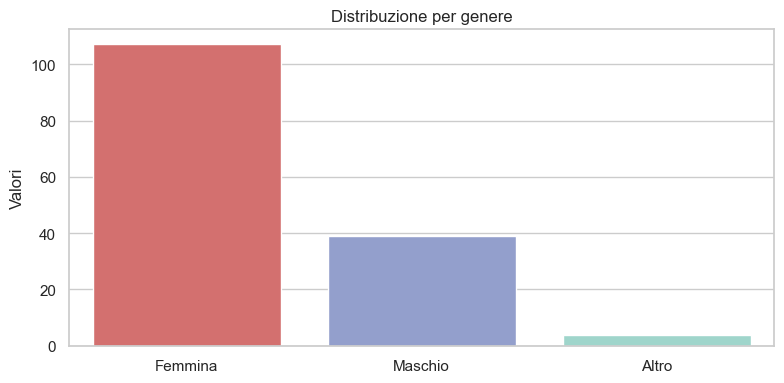

In [6]:
plt.figure(figsize=(8, 4))
pal={'Femmina':'#e4605e', 'Maschio':'#899ad5', 'Altro':'#96ded1'}
g=sns.countplot(data=df, x = 'Genere', hue = 'Genere', palette=pal)
g.set_title('Distribuzione per genere');
g.set_xlabel('')
g.set_ylabel('Valori')

plt.tight_layout()
plt.show()

-----

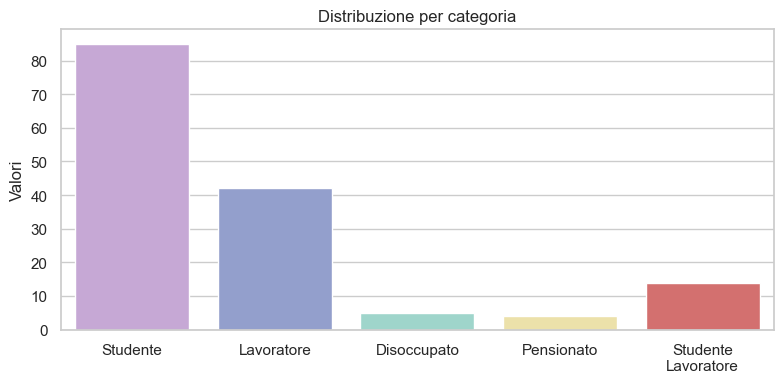

In [7]:
plt.figure(figsize=(8, 4))
pal1={'Studente':'#c9a0dc', 'Lavoratore':'#899ad5', 'Disoccupato':'#96ded1', 'Pensionato':'#f7e89f', 'Studente\nLavoratore':'#e4605e'}
g=sns.countplot(data=df, x = 'Categoria', hue = 'Categoria', palette=pal1)
g.set_title('Distribuzione per categoria');
g.set_xlabel('')
g.set_ylabel('Valori')

plt.tight_layout()
plt.show()

-----

## Esiste una correlazione tra età, genere e libri letti all'anno?

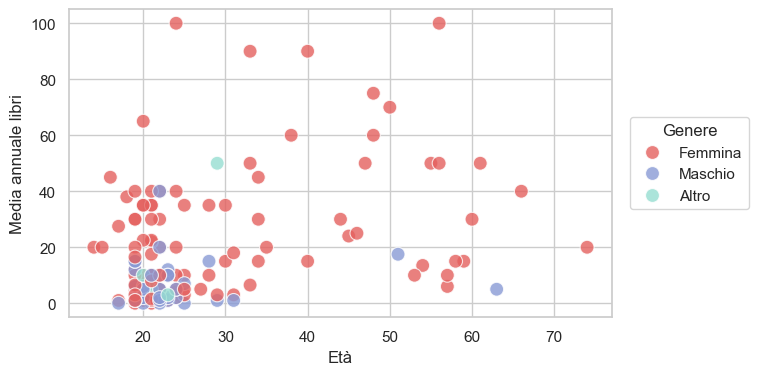

In [11]:
plt.figure(figsize=(7, 4))
g=sns.scatterplot(data=df, x='Età', y='Media', hue='Genere', s=100, alpha=0.80, palette=pal);
#g.set_title('Correlazione tra età, genere e media libri letti');
g.legend(title='Genere', loc='center left', bbox_to_anchor=(1.02, 0.5))
g.set_ylabel('Media annuale libri')
plt.show()

-----

## Esiste una correlazione tra categoria e libri letti all'anno?

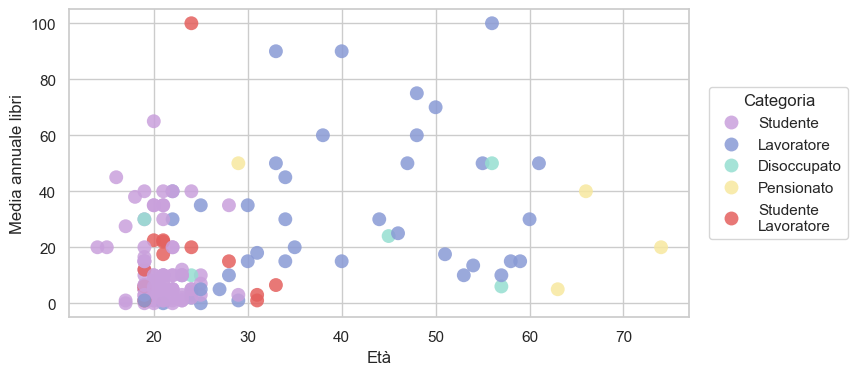

In [12]:
plt.figure(figsize=(8, 4))
g=sns.scatterplot(data=df, x='Età', y='Media', hue='Categoria', s=100, linewidth=0, alpha=.85, palette=pal1)
#g.set_title('Correlazione tra categoria e media libri letti');
g.legend(title='Categoria', loc='center left', bbox_to_anchor=(1.02, 0.5))
g.set_ylabel('Media annuale libri')
plt.show()

-----

## Qual è il momento della giornata in cui si legge di più?

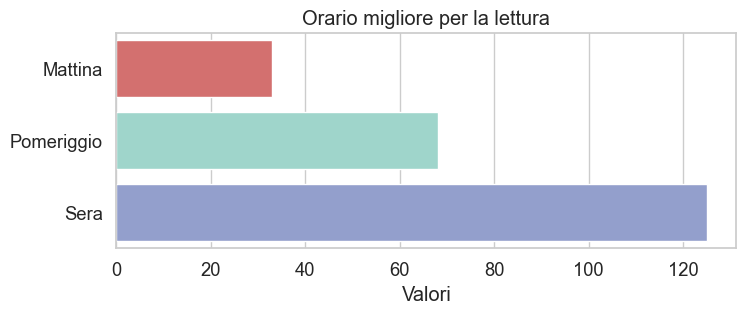

In [141]:
fasce_orarie = df['Orario'].str.split(", ").explode()
fasce_df = pd.DataFrame({'Fascia': fasce_orarie})
plt.figure(figsize=(8, 2.8))
sns.set(style='whitegrid', font_scale=1.2)
pal1={'Mattina':'#e4605e', 'Pomeriggio':'#96ded1', 'Sera':'#899ad5'}
g=sns.countplot(data=fasce_df, y='Fascia', order=['Mattina', 'Pomeriggio', 'Sera'], hue='Fascia', palette=pal1)
g.set_title('Orario migliore per la lettura');
g.set_xlabel('Valori')
g.set_ylabel('')
plt.show()

-----

## Qual è la tipologia di libri preferita? E quella più comoda?

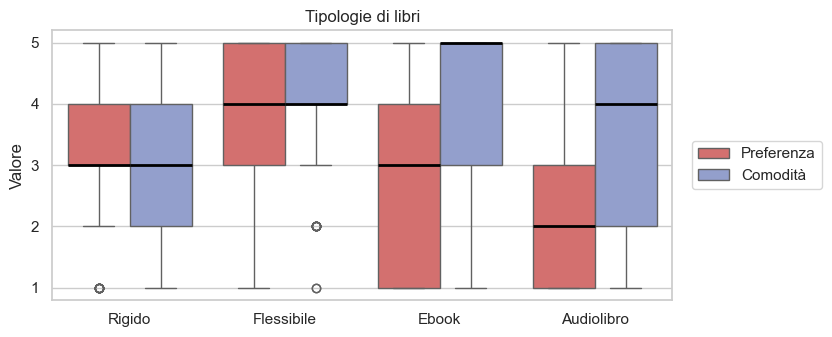

In [39]:
plt.figure(figsize=(8, 3.5))
df_pref=df[['pref_rigido', 'pref_flessibile', 'pref_ebook', 'pref_audiolibro']]
df_pref.columns=['Rigido', 'Flessibile', 'Ebook', 'Audiolibro']
df_pref = df_pref.melt(var_name='Tipo', value_name='Valore')    #per rendere più facile la raccolta dei valori
df_pref['Categoria'] = 'Preferenza'      #in modo che tutte le colonne df_pref facciano parte di "Preferenza"

df_com=df[['com_rigido', 'com_flessibile', 'com_ebook', 'com_audiolibro']]
df_com.columns=['Rigido', 'Flessibile', 'Ebook', 'Audiolibro']
df_com = df_com.melt(var_name='Tipo', value_name='Valore')
df_com['Categoria'] = 'Comodità'       #in modo che tutte le colonne df_com facciano parte di "Comodità"

df_long=pd.concat([df_pref, df_com], ignore_index=True)
g=sns.boxplot(data=df_long, x='Tipo', y='Valore', hue='Categoria', palette=['#e4605e', '#899ad5'])
g.set_title('Tipologie di libri');
g.set_xlabel('')
g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

for i, line in enumerate(g.lines):      #prendere tutte le linee del grafico
    if i % 6 == 4:    # la mediana è la quarta riga presente nel boxplot
        line.set_color('black')
        line.set_linewidth(2)    #più spessa così viene evidenziata
plt.show()

-----

## Qual è il genere più amato? E quello meno amato?

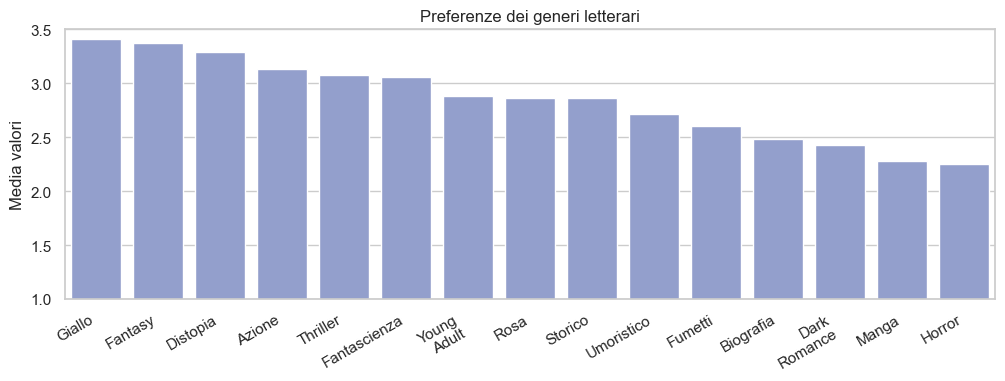

In [6]:
generi=df[df.columns[-15:]]
media_generi=generi.mean().sort_values(ascending=False).reset_index()
media_generi.columns=['Genere', 'Media']
plt.figure(figsize=(12, 3.5))
g=sns.barplot(data=media_generi, x = 'Genere', y = 'Media', color='#899ad5')
g.set_title('Preferenze dei generi letterari');
g.set_xlabel('')
g.set_ylabel('Media valori')
g.set_ylim([1.0,3.5]);
plt.xticks(rotation=30, ha='right')    #sennò si accavallano le scritte
#plt.tight_layout()      devo vedere se servirà   
plt.show()

-----

# Conclusioni finali

-----

In [33]:
# Trasformazione in pickle
df_pickle=df.to_pickle('AnalisiLettura.pkl')